# Distribution Plots

1. distplot
2. jointplot
3. pairplot
4. rugplot
5. kdeplot

Import

In [1]:
import seaborn as sns
%matplotlib inline

Data

In [2]:
#built in dataset
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


distplot (Distribution)

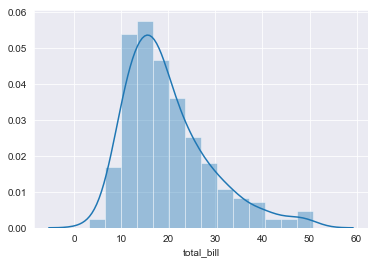

In [5]:
#distplot
sns.distplot(tips['total_bill'])
sns.set() # for giving the grid
#safe to ignore warnings

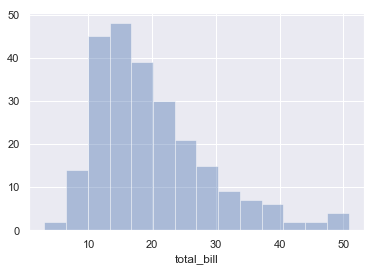

In [7]:
#if want to show histogram without kde layer
sns.distplot(tips['total_bill'],kde=False)
sns.set()

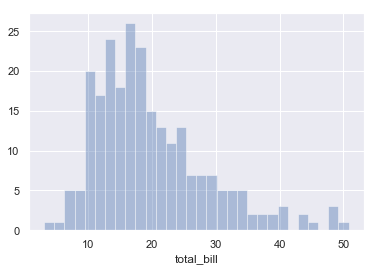

In [8]:
# divide data more precise
sns.distplot(tips['total_bill'],kde=False,bins=30)
sns.set()

jointplot (Match up 2 different distribution)

1. “scatter”
2. “reg”
3. “resid”
4. “kde”
5. “hex”

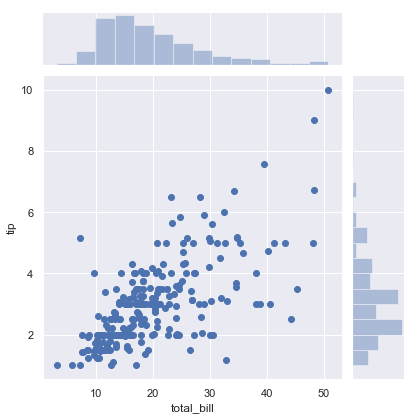

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')
sns.set()

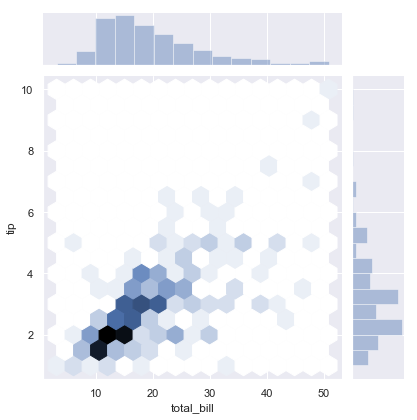

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
sns.set()

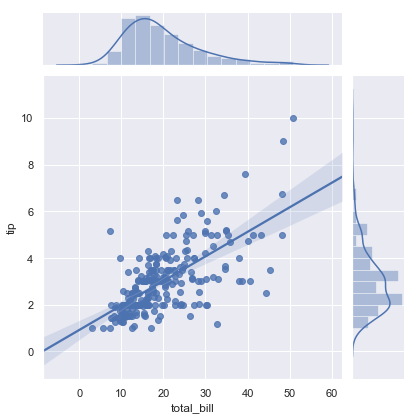

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')
sns.set()

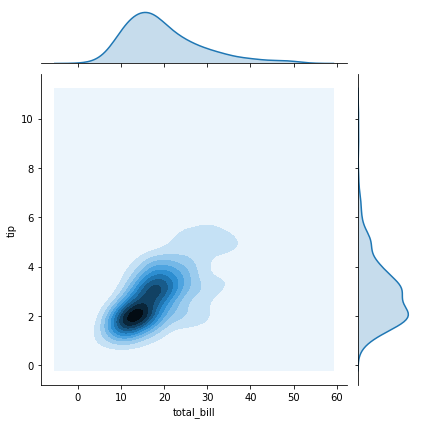

In [22]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

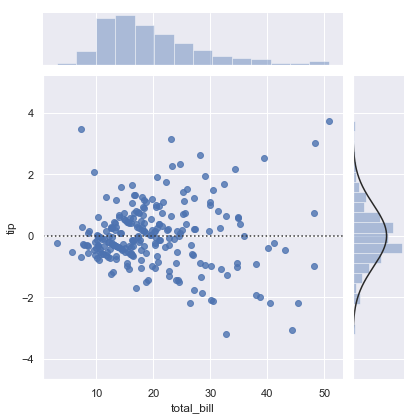

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='resid')
sns.set()

pairplot (pairwise relationships entire dataframe, numerical column value)

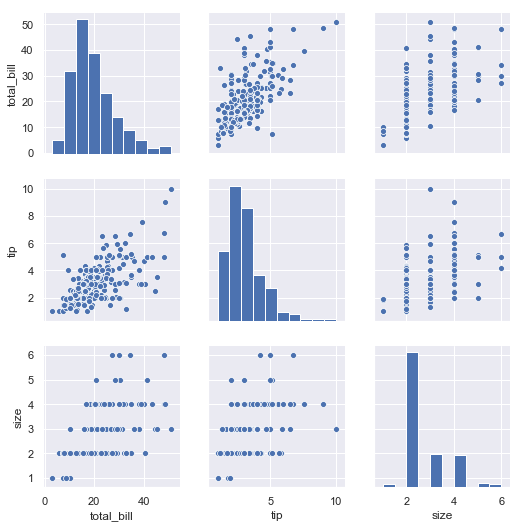

In [13]:
# Do joint plot for entire numerical value data frame
sns.pairplot(tips)
sns.set()

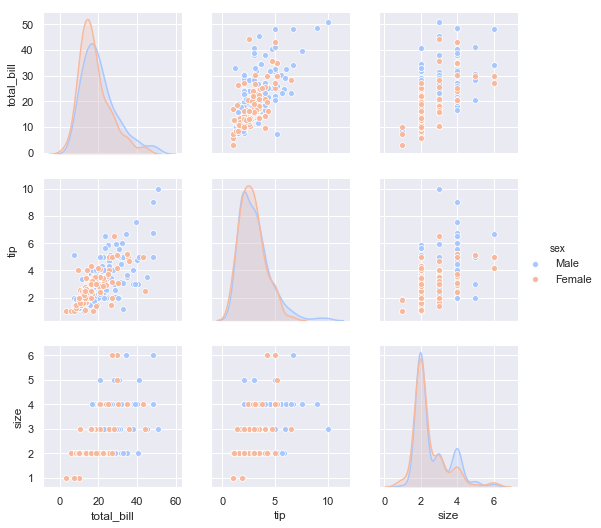

In [14]:
# hue used for categorical column which is usually not-numerical value
sns.pairplot(tips,hue='sex',palette='coolwarm')
sns.set()

rugplot (building block of a KDE)

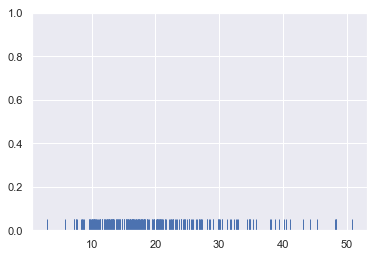

In [15]:
sns.rugplot(tips['total_bill'])
sns.set()

kdeplot (Kernel Density Estimation Plots)

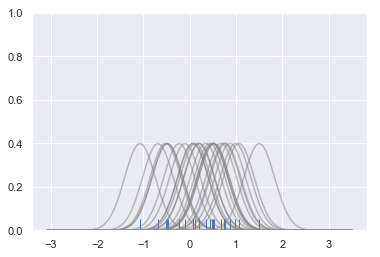

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25) # array around 1

#Create another rugplot
sns.rugplot(dataset);

#Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

#100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

#Set up the bandwidth
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create a empty kernel list
kernel_list = []

#Plot for each basis function
for data_point in dataset:
    
    #Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
 
plt.ylim(0,1)
sns.set()

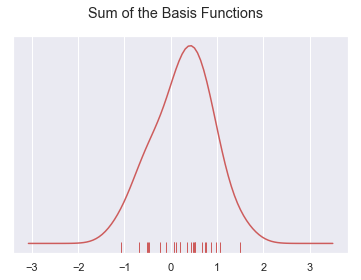

In [17]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

sns.set()

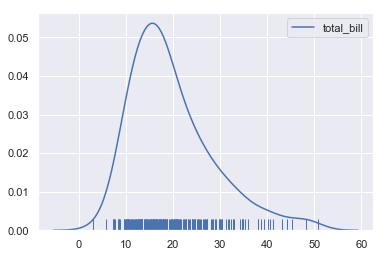

In [18]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])
sns.set()

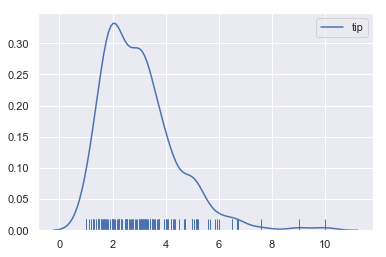

In [19]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])
sns.set()